# Improts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Data

In [219]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

scaler = StandardScaler()

X = scaler.fit_transform(X)

# Research

## Elbow method

In [220]:
def elbow_method(X, max_k=10):

    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        distortions.append(kmeans.inertia_)

    plt.subplot(2, 3, 1)
    plt.plot(range(1, max_k + 1), distortions, marker="o")
    plt.title("Метод локтя")
    plt.xlabel("Количество кластеров")
    plt.ylabel("Дисторсия")

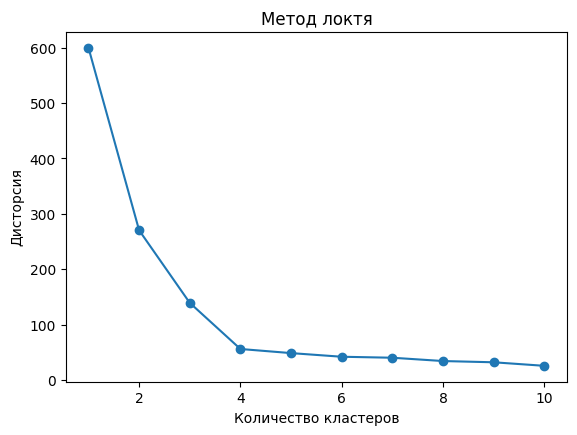

In [221]:
plt.figure(figsize=(22, 10))
elbow_method(X)

## KMeans

Text(0, 0.5, 'Признак 2')

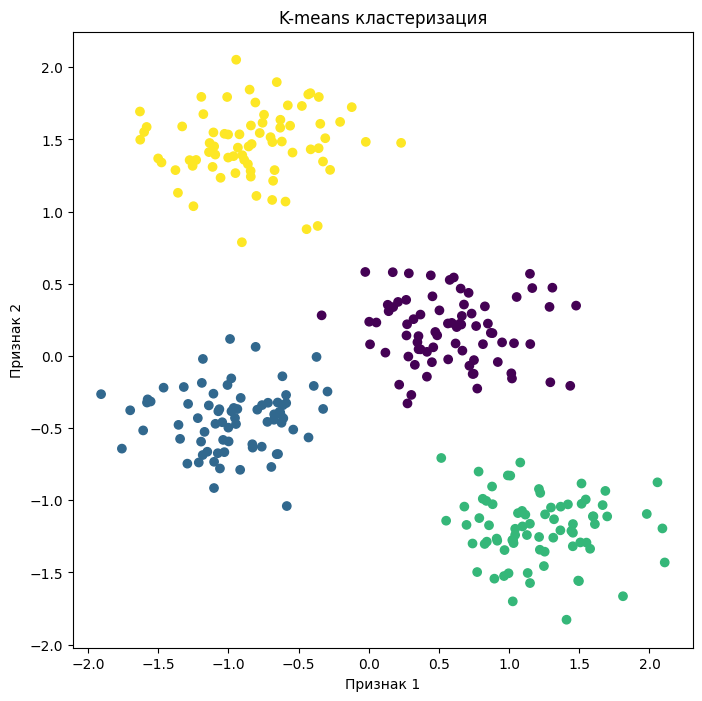

In [222]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis")
plt.title("K-means кластеризация")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

## DBSCAN

Text(0, 0.5, 'Признак 2')

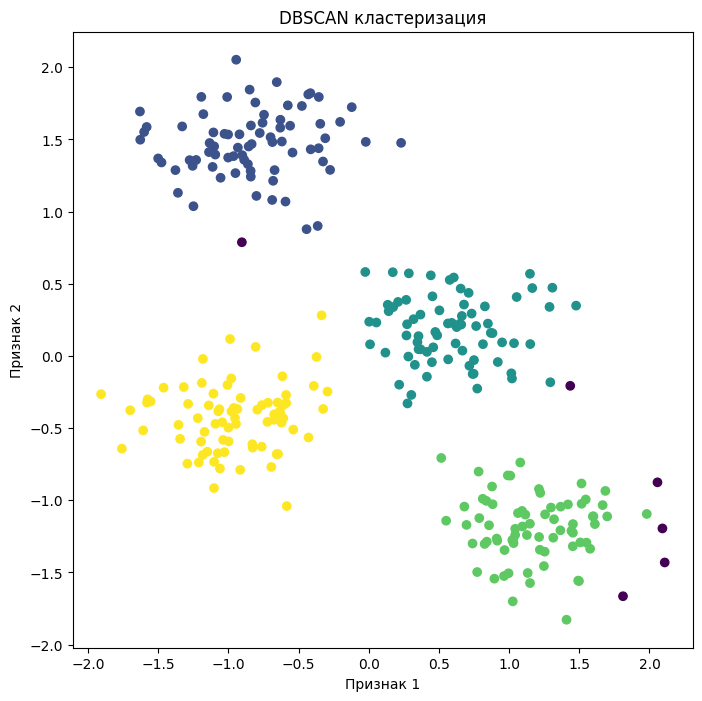

In [223]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap="viridis")
plt.title("DBSCAN кластеризация")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

## Dendrogram

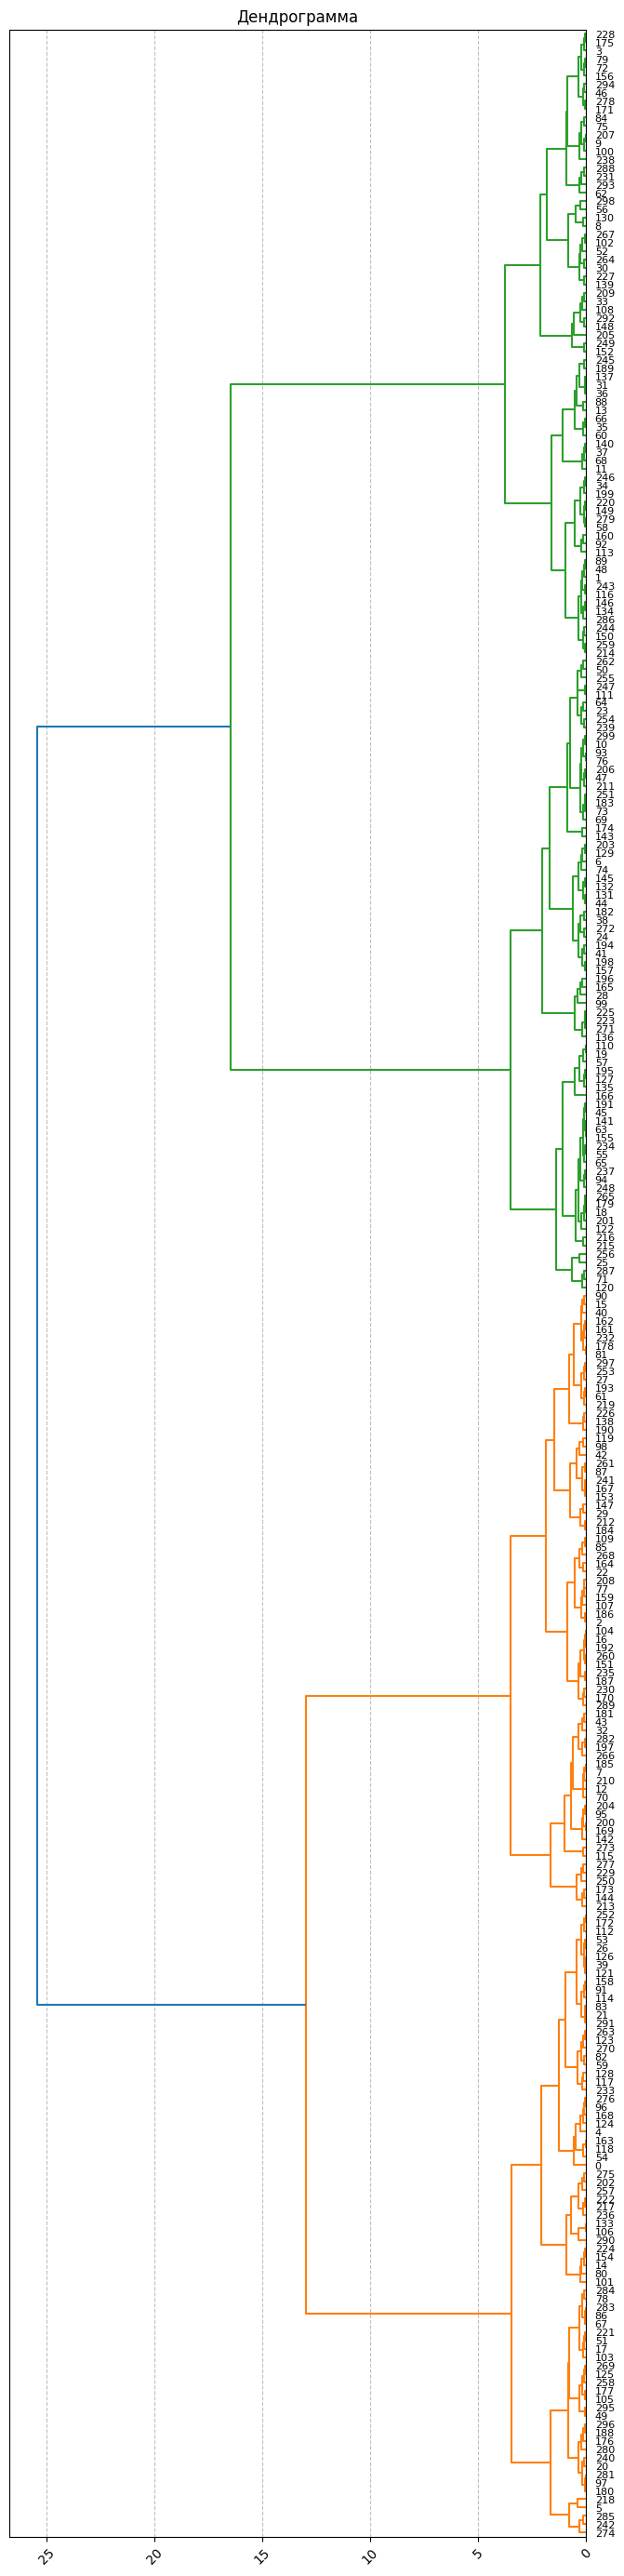

In [224]:
plt.figure(figsize=(8, 35))
Z = linkage(X, method="ward")  # ward минимизует дисперсию в кластерах
dendrogram(Z, orientation="left")
plt.title("Дендрограмма")
plt.grid(axis="x", alpha=0.5, linestyle="--", color="gray")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=8)
plt.show()

## Hierarchical

Метрики кластеризации:
K-means:
  Silhouette Score: 0.66
  Adjusted Rand Index: 1.00
DBSCAN:
  Silhouette Score: 0.63
  Adjusted Rand Index: 0.96
Иерархическая:
  Silhouette Score: 0.66
  Adjusted Rand Index: 0.99


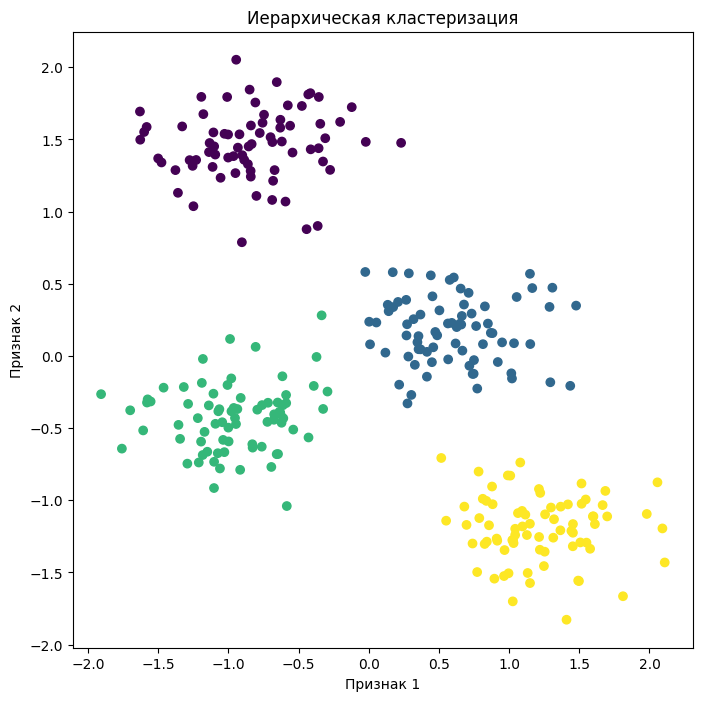

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=4)
y_hierarchical = hierarchical.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_hierarchical, cmap="viridis")
plt.title("Иерархическая кластеризация")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")

methods = [
    ("K-means", y_kmeans),
    ("DBSCAN", y_dbscan),
    ("Иерархическая", y_hierarchical),
]

print("Метрики кластеризации:")
for name, labels in methods:
    if len(np.unique(labels)) > 1:
        sil_score = silhouette_score(X, labels)
        ari_score = adjusted_rand_score(y_true, labels)
        print(f"{name}:")
        print(f"  Silhouette Score: {sil_score:.2f}")
        print(f"  Adjusted Rand Index: {ari_score:.2f}")
    else:
        print(f"{name}: невозможно вычислить метрики")

plt.show()